(48, 432)
(48, 432)
(48, 432)
(48, 432)
(48, 432)


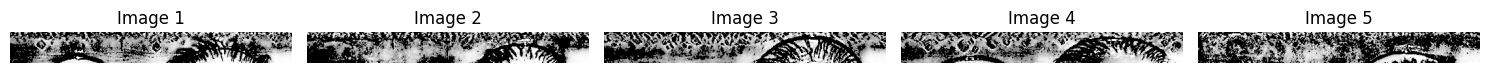

In [1]:
import os
import matplotlib.pyplot as plt
import cv2

dataset_path = "/kaggle/input/iitd-normalized/Normalized_Images"
image_files = []

def load_and_display_images(dataset_path, num_images=5):


    global image_files
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.jpg', '.png', '.bmp', '.tiff')):  
                image_files.append(os.path.join(root, file))
    

    if len(image_files) < num_images:
        print(f"Only {len(image_files)} images found in the dataset.")
        num_images = len(image_files)
    

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, ax in enumerate(axes):
        img_path = image_files[i]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        print(img.shape)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Image {i + 1}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


load_and_display_images(dataset_path)


In [2]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, InceptionV3, MobileNet, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score


base_dir = "/kaggle/input/iitd-normalized/Normalized_Images"
data_dir = "/kaggle/working/Dataset"


os.makedirs(data_dir, exist_ok=True)



def split_data(base_dir, data_dir):
    for file_name in os.listdir(base_dir):
        folder_name = file_name.split("_")[0]
        folder_path = os.path.join(data_dir, folder_name)
        os.makedirs(folder_path, exist_ok=True)
        shutil.copy(os.path.join(base_dir, file_name), os.path.join(folder_path, file_name))

split_data(base_dir, data_dir)



In [3]:

base_dir = "/kaggle/working/Dataset"
train_dir = "/kaggle/working/train"
test_dir = "/kaggle/working/test"


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


def split_data(base_dir, train_dir, test_dir):
    for person in os.listdir(base_dir):
        person_dir = os.path.join(base_dir, person)
        if os.path.isdir(person_dir):
                    images = [f for f in os.listdir(person_dir) if f.endswith('.bmp')]
                    random.shuffle(images)
                    train_images = images[:4]
                    test_images = images[4:5]
                    print(f"Total images {len(images)} ; Train : {len(train_images)} ; Test : {len(test_images)}")


                    train_eye_dir = os.path.join(train_dir, person)
                    os.makedirs(train_eye_dir, exist_ok=True)
                    for img in train_images:
                        shutil.copy(os.path.join(person_dir, img), os.path.join(train_eye_dir, img))

                    test_eye_dir = os.path.join(test_dir, person)
                    os.makedirs(test_eye_dir, exist_ok=True)
                    for img in test_images:
                        shutil.copy(os.path.join(person_dir, img), os.path.join(test_eye_dir, img))

split_data(base_dir, train_dir, test_dir)



Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images 5 ; Train : 4 ; Test : 1
Total images

In [4]:
print("S")

S


In [5]:
# %% Import necessary libraries
import os
import random
import shutil
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader

# %% Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:

train_dir = "/kaggle/working/train"
test_dir = "/kaggle/working/test"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)


In [7]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 896
    Root location: /kaggle/working/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [8]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 224
    Root location: /kaggle/working/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [9]:

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


In [10]:


model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features


num_classes = len(train_dataset.classes)
model.classifier = nn.Linear(num_ftrs, num_classes)
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, train_loader, test_loader, criterion, optimizer, epochs=20):
    train_acc_list, val_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        train_acc_list.append(train_acc)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}")


        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_acc = correct / total
        val_acc_list.append(val_acc)
        print(f"Validation Accuracy: {100 * val_acc:.2f}%\n")

    return train_acc_list, val_acc_list


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 143MB/s] 


In [11]:

train_acc, val_acc = train(model, train_loader, test_loader, criterion, optimizer, epochs=10)

torch.save(model.state_dict(), "densenet_finetuned.pth")


Epoch 1/10, Loss: 5.8100, Train Acc: 0.0089
Validation Accuracy: 6.25%

Epoch 2/10, Loss: 4.3743, Train Acc: 0.1819
Validation Accuracy: 52.23%

Epoch 3/10, Loss: 2.1747, Train Acc: 0.7667
Validation Accuracy: 94.20%

Epoch 4/10, Loss: 0.5848, Train Acc: 0.9844
Validation Accuracy: 98.66%

Epoch 5/10, Loss: 0.1158, Train Acc: 1.0000
Validation Accuracy: 99.11%

Epoch 6/10, Loss: 0.0355, Train Acc: 1.0000
Validation Accuracy: 99.11%

Epoch 7/10, Loss: 0.0179, Train Acc: 1.0000
Validation Accuracy: 99.11%

Epoch 8/10, Loss: 0.0133, Train Acc: 1.0000
Validation Accuracy: 99.11%

Epoch 9/10, Loss: 0.0112, Train Acc: 1.0000
Validation Accuracy: 99.11%

Epoch 10/10, Loss: 0.0089, Train Acc: 1.0000
Validation Accuracy: 99.11%



In [12]:

def evaluate(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    print("\nTest Accuracy:", correct / total)

evaluate(model, test_loader)



Test Accuracy: 0.9910714285714286


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch

def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

    return acc, precision, recall, f1, cm


acc, precision, recall, f1, cm = evaluate_model(model, test_loader, device)


Accuracy: 0.9911
Precision: 0.9866
Recall: 0.9911
F1-score: 0.9881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


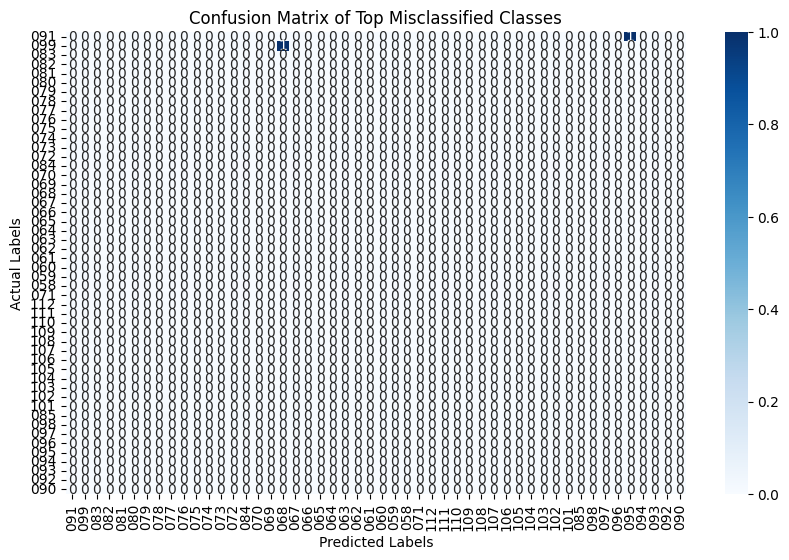

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_misclassified(cm, class_names, top_n=10):
    np.fill_diagonal(cm, 0)  # Ignore correct predictions
    misclassified = np.sum(cm, axis=1)
    top_misclassified_indices = np.argsort(misclassified)[::-1][:top_n]
    
    reduced_cm = cm[top_misclassified_indices][:, top_misclassified_indices]
    reduced_class_names = [class_names[i] for i in top_misclassified_indices]

    plt.figure(figsize=(10, 6))
    sns.heatmap(reduced_cm, annot=True, fmt="d", cmap="Blues", xticklabels=reduced_class_names, yticklabels=reduced_class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix of Top Misclassified Classes")
    plt.show()


plot_top_misclassified(cm, train_dataset.classes, top_n=50)


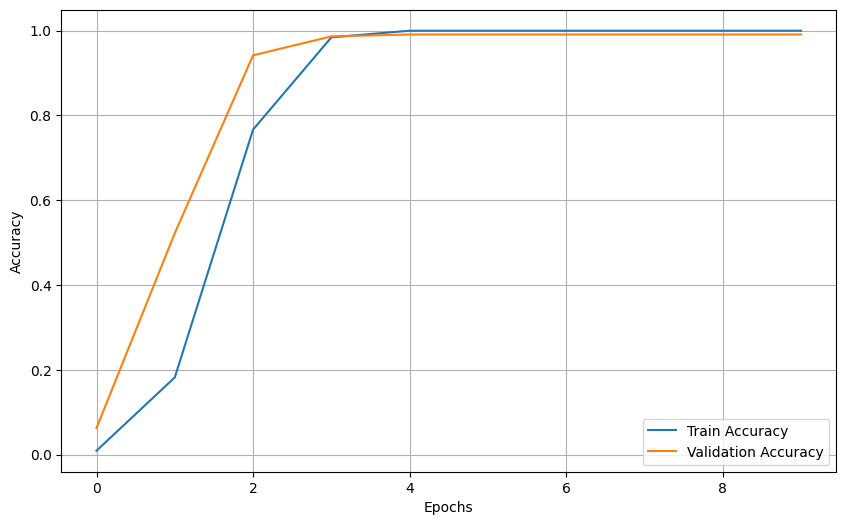

In [15]:


plt.figure(figsize=(10, 6))
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


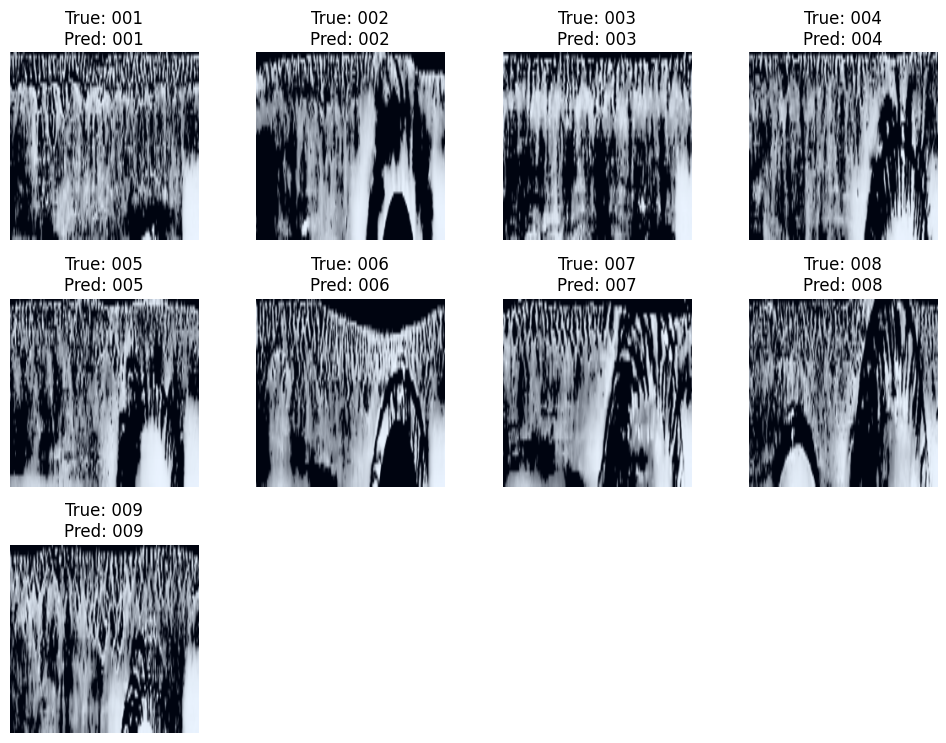

In [16]:

# %% Prediction & Display Function
def predict_and_display(model, test_loader, class_names, num_images=5):
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images[:num_images], labels[:num_images]
    images = images.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(int(num_images**0.5) + 1, int(num_images**0.5) + 1, i + 1)
        img = images[i].cpu().permute(1, 2, 0).numpy()  
        img = (img - img.min()) / (img.max() - img.min())  
        plt.imshow(img)
        plt.axis("off")
        true_label = class_names[labels[i].item()]
        pred_label = class_names[preds[i].item()]
        plt.title(f"True: {true_label}\nPred: {pred_label}")

    plt.tight_layout()
    plt.show()


class_names = train_dataset.classes
predict_and_display(model, test_loader, class_names, num_images=9)


In [17]:
for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            print(images.shape)

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


In [18]:
import torch
import torch.nn as nn
import torchvision.models as models


densenet = models.densenet121(pretrained=True)
num_ftrs = densenet.classifier.in_features


num_classes = len(train_dataset.classes)
densenet.classifier = nn.Linear(num_ftrs, num_classes)
densenet = densenet.to(device)

densenet.load_state_dict(torch.load("densenet_finetuned.pth"))

densenet.classifier = nn.Identity()

class DenseNetFeatureExtractor(nn.Module):
    def __init__(self, densenet_model):
        super(DenseNetFeatureExtractor, self).__init__()
        self.features = densenet_model.features
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.features(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        return x


feature_extractor = DenseNetFeatureExtractor(densenet).to(device)
feature_extractor.eval()


dummy_input = torch.randn(1, 3, 224, 224).to(device)
features = feature_extractor(dummy_input)
print("Extracted feature vector shape:", features.shape)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-18-d42fd67a67cf>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more

Extracted feature vector shape: torch.Size([1, 1024])


In [19]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np



class CancellableTemplate:

    def __init__(self, feature_dim, template_dim, user_key):

        # Seed the NumPy random generator so that the same user_key always produces the same matrix.
        np.random.seed(user_key)
        # Generate a random projection matrix of shape (template_dim, feature_dim).
        self.R = np.random.randn(template_dim, feature_dim)
    
    def transform(self, feature_vector):

        # Apply the random projection.
        projected = np.dot(self.R, feature_vector)
        # Binarize the projected vector by thresholding at 0.
        binary_template = (projected > 0).astype(np.int64)
        return binary_template

In [20]:

def compute_hamming_distance(template1, template2):
    
    if template1.shape != template2.shape:
        raise ValueError("Templates must have the same shape.")
        
    differing_bits = np.sum(template1 != template2)
    normalized_distance = differing_bits / template1.size
    
    return normalized_distance

def compare_templates(enrolled_template, candidate_template, threshold=0.1):
    distance = compute_hamming_distance(enrolled_template, candidate_template)
    match = distance < threshold
    return match, distance

In [98]:
from PIL import Image

out_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def getTemplateForImage(path):

    image = Image.open(path)
    image = out_transform(image).unsqueeze(0).to(device)


    with torch.no_grad():
        features = feature_extractor(image)  
    

    features_np = features.cpu().numpy().flatten()

    user_key = 12345
    template_dim = 128
    feature_dim = features_np.shape[0]
    
    
    cancellable = CancellableTemplate(feature_dim, template_dim, user_key)
    
    
    enrolled_template = cancellable.transform(features_np)
    return enrolled_template
    
    
getTemplateForImage("/kaggle/working/Dataset/001/001_1.bmp")

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [102]:
def plotBits(template):
    bit_array = np.array(template, dtype=np.uint8)

    # Reshape into a 32x16 matrix
    image_matrix = bit_array.reshape((16, 8))

    # Display the image
    plt.figure(figsize=(4, 8))
    plt.imshow(image_matrix, cmap="gray", interpolation="nearest")
    plt.axis("off")  # Hide axis
    plt.title("16×8 Binary Image")
    plt.show()


[0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1]


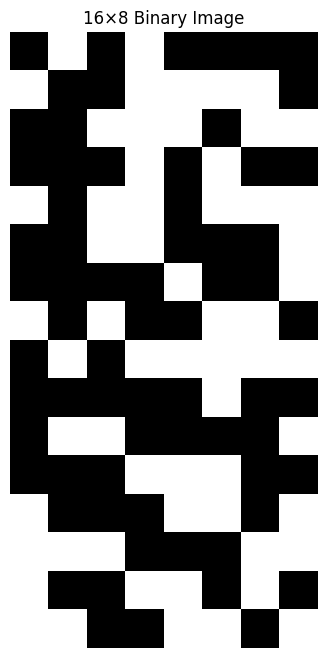

In [108]:
bits = getTemplateForImage("/kaggle/input/iitd-normalized/Normalized_Images/004_1.bmp")
print(bits)
plotBits(bits)

In [109]:
os.listdir("/kaggle/working/train/008")

['008_1.bmp', '008_3.bmp', '008_5.bmp', '008_2.bmp']

In [110]:
db = {}
train_dir
for person in os.listdir(train_dir):
        person_dir = os.path.join(train_dir, person)
        if os.path.isdir(person_dir):
                    images = [os.path.join(person_dir, f) for f in os.listdir(person_dir) if f.endswith('.bmp')]
                    templates=[getTemplateForImage(path) for path in images]
                    print(f"Generated {len(images)} templates for user {person} " )
                    db[person] = templates
print(db.keys())

Generated 4 templates for user 098 
Generated 4 templates for user 039 
Generated 4 templates for user 065 
Generated 4 templates for user 017 
Generated 4 templates for user 044 
Generated 4 templates for user 078 
Generated 4 templates for user 125 
Generated 4 templates for user 002 
Generated 4 templates for user 141 
Generated 4 templates for user 074 
Generated 4 templates for user 043 
Generated 4 templates for user 088 
Generated 4 templates for user 184 
Generated 4 templates for user 182 
Generated 4 templates for user 018 
Generated 4 templates for user 013 
Generated 4 templates for user 194 
Generated 4 templates for user 158 
Generated 4 templates for user 056 
Generated 4 templates for user 022 
Generated 4 templates for user 175 
Generated 4 templates for user 089 
Generated 4 templates for user 075 
Generated 4 templates for user 206 
Generated 4 templates for user 071 
Generated 4 templates for user 103 
Generated 4 templates for user 174 
Generated 4 templates for us

In [112]:
#TEST

candidate_template = getTemplateForImage("/kaggle/input/iitd-normalized/Normalized_Images/001_1.bmp")


for key in db.keys():
    enrolled_templates = db[key]
    
    for enrolled_template in enrolled_templates:
        match,distance = compare_templates(enrolled_template,candidate_template)
        
        if match:
            print(f"Matched User : {key} , distance : {distance}" )



Matched User : 001 , distance : 0.0390625
Matched User : 001 , distance : 0.0546875
Matched User : 001 , distance : 0.0
Matched User : 001 , distance : 0.046875


In [113]:
#TEST
verification_data={}
THRESHOLD  = 0.18
print(f"{'User':<8} {'Total':<8} {'Matched':<8} {'Mismatches':<12} {'Mismatched-Distances':<20}")
for person in os.listdir(test_dir):
        person_dir = os.path.join(test_dir, person)
        if os.path.isdir(person_dir):
                    images = [os.path.join(person_dir, f) for f in os.listdir(person_dir) if f.endswith('.bmp')]
            
                    enrolled_templates = db[person]
                    candidate_template = getTemplateForImage(images[0])

                    match_data = {}
                    count = 0
                    distances = []
                    mismatches = []
                    for enrolled_template in enrolled_templates:
                        match,distance = compare_templates(enrolled_template,candidate_template,threshold = THRESHOLD)
                        distances.append(distance)
                        if match:
                            count+=1
                        else:
                            mismatches.append(distance)
                    match_data["matches"] = count
                    match_data["mismatch_distances"] = mismatches
                    match_data["distances"] = distances
                    verification_data[person] = match_data
                    print(f"{person:<9} {len(templates):<8} {count:<8} {len(mismatches):<11} {str(mismatches):<20}")


User     Total    Matched  Mismatches   Mismatched-Distances
098       4        4        0           []                  
039       4        4        0           []                  
065       4        4        0           []                  
017       4        4        0           []                  
044       4        4        0           []                  
078       4        4        0           []                  
125       4        4        0           []                  
002       4        4        0           []                  
141       4        4        0           []                  
074       4        4        0           []                  
043       4        4        0           []                  
088       4        4        0           []                  
184       4        4        0           []                  
182       4        4        0           []                  
018       4        4        0           []                  
013       4        4    

In [114]:
compare_templates(db["001"][0],db["002"][0])

(False, 0.4765625)

In [115]:
THRESHOLD = 0.185


In [116]:
mismatches_distance = []
combinations = 0
matches=0
for i in db.keys():
    # print(f"Comparing user { i } with :" , end =" ")
    for j in db.keys():
        if i==j or (int(i) < int(j) ):
            continue
        # print(j,end=" ,")
            
        candidate_1_templates = db[i]
        candidate_2_templates = db[j]

        for x in candidate_1_templates:
            for y in candidate_2_templates:
                
                combinations+=1
                match , distance = compare_templates(x,y,THRESHOLD)
                
                if match:
                    matches+=1
                    print(f"Match for differnt users {i} and {j} with distance {distance}\n")
                else:
                    mismatches_distance.append(distance)
    # print()

print(f"Total combinations verified : {combinations} , matches = {matches} ")
print(f"Min Distance between two users : {min(mismatches_distance)}")
print(f"Max Distance between two users : {max(mismatches_distance)}")

Match for differnt users 165 and 159 with distance 0.1796875

Match for differnt users 157 and 016 with distance 0.1796875

Match for differnt users 157 and 016 with distance 0.1796875

Total combinations verified : 399616 , matches = 3 
Min Distance between two users : 0.1875
Max Distance between two users : 0.6015625


In [117]:

for thresIndex in range(1,17):
    thres = 0.165 + thresIndex*0.005
    mismatches_distance = []
    combinations = 0
    matches=0
    for i in db.keys():
        # print(f"Comparing user { i } with :" , end =" ")
        for j in db.keys():
            if i==j or (int(i) < int(j) ):
                continue
            # print(j,end=" ,")

            candidate_1_templates = db[i]
            candidate_2_templates = db[j]

            for x in candidate_1_templates:
                for y in candidate_2_templates:

                    combinations+=1
                    match , distance = compare_templates(x,y,thres)

                    if match:
                        matches+=1
                        # print(f"Match for differnt users {i} and {j} with distance {distance}\n")
                    else:
                        mismatches_distance.append(distance)
        # print()

    print(f"Total combinations verified : {combinations} , matches = {matches} , threshold = {thres} , precision = {((num_classes - matches) / num_classes) * 100 }")
    # print(f"Min Distance between two users : {min(mismatches_distance)}")
    # print(f"Max Distance between two users : {max(mismatches_distance)}")


Total combinations verified : 399616 , matches = 0 , threshold = 0.17 , precision = 100.0
Total combinations verified : 399616 , matches = 0 , threshold = 0.17500000000000002 , precision = 100.0
Total combinations verified : 399616 , matches = 3 , threshold = 0.18 , precision = 98.66071428571429
Total combinations verified : 399616 , matches = 3 , threshold = 0.185 , precision = 98.66071428571429
Total combinations verified : 399616 , matches = 6 , threshold = 0.19 , precision = 97.32142857142857
Total combinations verified : 399616 , matches = 6 , threshold = 0.195 , precision = 97.32142857142857
Total combinations verified : 399616 , matches = 15 , threshold = 0.2 , precision = 93.30357142857143
Total combinations verified : 399616 , matches = 30 , threshold = 0.20500000000000002 , precision = 86.60714285714286
Total combinations verified : 399616 , matches = 30 , threshold = 0.21000000000000002 , precision = 86.60714285714286
Total combinations verified : 399616 , matches = 65 , thr

In [124]:
templates_per_person = 4

result = {}
for i in range(templates_per_person+1):
    result[i] = 0 


total_min_mismatch_dist = 100
total_max_mismatch_dist = 0


for person, data in verification_data.items():
    
    matches_count = data['matches']
    mismatches_count = len(data['mismatch_distances'])
    
    count = result[mismatches_count] if mismatches_count in result else 0
    result[mismatches_count] = count + 1

    if mismatches_count > 0:
    
        min_mismatch_dist = min(data['mismatch_distances'])
        max_mismatch_dist = max(data['mismatch_distances'])
    
        total_min_mismatch_dist = min(total_min_mismatch_dist,min_mismatch_dist) 
        total_max_mismatch_dist = max(total_max_mismatch_dist,max_mismatch_dist) 
    
    
    if (matches_count < templates_per_person):
        #print(f" User {person} has {mismatches_count} mismatches with distances {data['mismatch_distances']}")
        pass


for i in range(1,templates_per_person+1) :
    print(f"Number of users with {i} mismatches  : {result[i]:<3} ")

print(f"Min Mismatch distance :  {total_min_mismatch_dist} , Max Mismatch distance:  {total_max_mismatch_dist}")

Number of users with 1 mismatches  : 5   
Number of users with 2 mismatches  : 3   
Number of users with 3 mismatches  : 1   
Number of users with 4 mismatches  : 3   
Min Mismatch distance :  0.1875 , Max Mismatch distance:  0.296875


In [125]:
all_mismatch_distances =[item for sublist in [verification_data[i]["mismatch_distances"] for i in verification_data] for item in sublist]
min(all_mismatch_distances)

0.1875

In [126]:
failed_mismatches = [verification_data[i]["mismatch_distances"] for i in verification_data if len(verification_data[i]["mismatch_distances"]) == 4]
print(len(failed_mismatches))

3


In [127]:
num_classes

224

In [128]:
thresold = THRESHOLD + 1 - 1 - 0.02
max_thresold = 0.245
while (thresold < max_thresold):
    
    thresold+=0.005
    count=0
    failed_users = []
    for person in verification_data:
        failed_mismatches = verification_data[person]["mismatch_distances"]
        if (len(failed_mismatches) != 4):
            continue
        for distance in failed_mismatches:
                if distance > thresold:
                    count+=1
                    failed_users.append(person)
                    break
    print(f"Number of failed users accepted for thresold {round(thresold,3):<5} : {count} , Accuracy = {((num_classes - count) /num_classes ) * 100 }")
print(failed_users)

Number of failed users accepted for thresold 0.17  : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.175 : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.18  : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.185 : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.19  : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.195 : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.2   : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.205 : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.21  : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.215 : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.22  : 3 , Accuracy = 98.66071428571429
Number of failed users accepted for thresold 0.225 : 3

In [129]:
all_templates = {}
for person in os.listdir(base_dir):
        person_dir = os.path.join(base_dir, person)
        if os.path.isdir(person_dir):
                    images = [os.path.join(person_dir, f) for f in os.listdir(person_dir) if f.endswith('.bmp')]
                    templates=[getTemplateForImage(path) for path in images]
                    print(f"Generated {len(images)} templates for user {person} " )
                    all_templates[person] = templates
print(all_templates.keys())

Generated 5 templates for user 098 
Generated 5 templates for user 039 
Generated 5 templates for user 065 
Generated 5 templates for user 017 
Generated 5 templates for user 044 
Generated 5 templates for user 078 
Generated 5 templates for user 125 
Generated 5 templates for user 002 
Generated 5 templates for user 141 
Generated 5 templates for user 074 
Generated 5 templates for user 043 
Generated 5 templates for user 088 
Generated 5 templates for user 184 
Generated 5 templates for user 182 
Generated 5 templates for user 018 
Generated 5 templates for user 013 
Generated 5 templates for user 194 
Generated 5 templates for user 158 
Generated 5 templates for user 056 
Generated 5 templates for user 022 
Generated 5 templates for user 175 
Generated 5 templates for user 089 
Generated 5 templates for user 075 
Generated 5 templates for user 206 
Generated 5 templates for user 071 
Generated 5 templates for user 103 
Generated 5 templates for user 174 
Generated 5 templates for us

In [97]:
#INTRACLASS COMBINATIONS:

intra_combs = 0
intra_mismatches = 0
intra_mismatch_distances = []
mismatch_users = {}

for person in all_templates:

    distances = []
    mismatch_distances = []
    mismatches_within_same_class=0
    templates = all_templates[person]
    
    for i in range(len(templates)):
        for j in range(len(templates)):
            if (i == j) or (i < j):
                continue
                
            intra_combs+=1
            match , distance = compare_templates(templates[i],templates[j],THRESHOLD)
            distances.append(distance)
                
            if not match:
                mismatches_within_same_class += 1
                mismatch_distances.append(distance)
                mismatch_users[person] = (mismatches_within_same_class)

    intra_mismatches+=mismatches_within_same_class
    intra_mismatch_distances.extend(mismatch_distances)
    # print(intra_combs)

print("\n\n")


print(f"Total combinations verified : {intra_combs} , Mismatches = {intra_mismatches} ")
print(f"Min Distance between within same user : {min(intra_mismatch_distances)}")
print(f"Max Distance between within same user : {max(intra_mismatch_distances)}")

print("\n\n")

for person in  dict(sorted(mismatch_users.items(), key=lambda item: item[1])):
    print(f"User {person:<4} -> Mismatches : {mismatch_users[person]} ")
            





Total combinations verified : 2240 , Mismatches = 24 
Min Distance between within same user : 0.19140625
Max Distance between within same user : 0.29296875



User 009  -> Mismatches : 1 
User 119  -> Mismatches : 1 
User 137  -> Mismatches : 1 
User 003  -> Mismatches : 1 
User 118  -> Mismatches : 2 
User 026  -> Mismatches : 2 
User 042  -> Mismatches : 4 
User 201  -> Mismatches : 4 
User 091  -> Mismatches : 4 
User 099  -> Mismatches : 4 
